<a href="https://colab.research.google.com/github/FayyazShaikh98/Cars24_webscraping/blob/main/Cars24_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

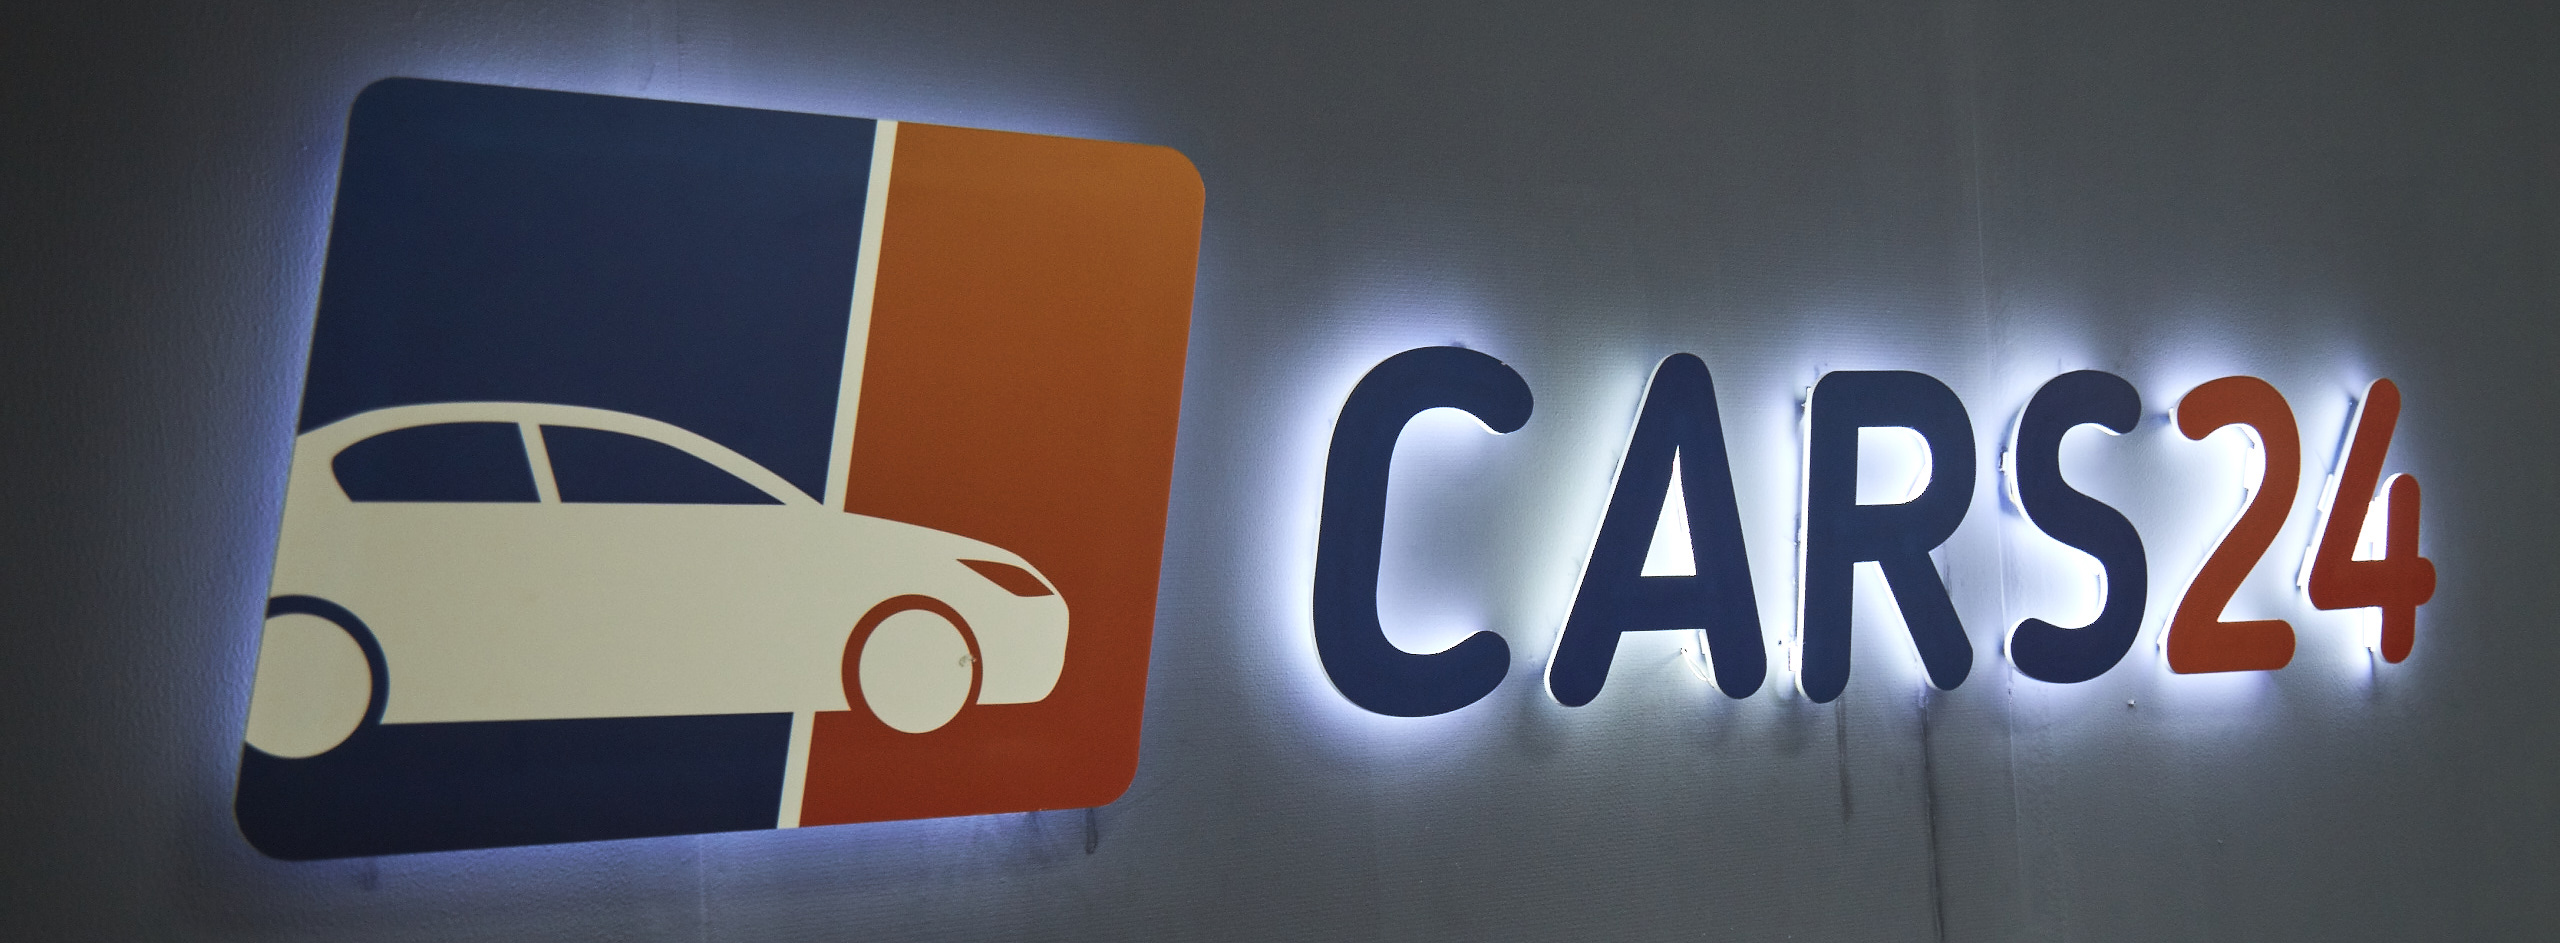

### **Project Title** : Web scraping of cars24 website.
### **About Project**
### In an era where data drives decisions, the ability to extract and harness information from online sources is invaluable. This project leverages the power of BeautifulSoup, a sophisticated web scraping tool, to delve into the dynamic world of Cars24. By navigating the site's intricate HTML framework, I have unearthed data on used cars in Mumbai region, including pricing, car models, fuel types, specifications and more. This project not only showcases web scraping techniques but also highlights the importance of data integrity and accuracy in digital information gathering.

### Let's Start

### Importing Libraries

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

### Getting started with web scraping

In [ ]:
# Getting a cars24_url to parse the html code
cars24_url = 'https://www.cars24.com/buy-used-cars-mumbai/'
HEADERS = ({'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",'Accept-Language': 'en-US, en;q=0.5'})
response = requests.get(cars24_url, headers=HEADERS)

In [ ]:
# using soup to get html code
soup= BeautifulSoup(response.text, "html.parser")

In [ ]:
# Soup will give all the html code of whole cars24_url page
soup

### Task 1: Getting cars model

In [ ]:
cars = soup.find_all('h3', attrs = {'class': '_11dVb'})[0].text

In [ ]:
# Creating a for loop to get all the cars model name.
cars_model = []
for i in soup.find_all('h3', attrs = {'class': '_11dVb'}):
  cars_model.append(i.text)

In [ ]:
# List of cars model
cars_model

['2018 Tata TIGOR XZ PETROL',
 '2018 Maruti Dzire VXI AMT',
 '2014 Hyundai Xcent S 1.2',
 '2016 Hyundai Elite i20 ASTA 1.2 (O)',
 '2019 Volkswagen Ameo COMFORTLINE 1.0L',
 '2014 Maruti Swift Dzire ZDI',
 '2018 Hyundai Elite i20 ASTA 1.2 (O)',
 '2012 Honda Brio V MT',
 '2012 Maruti Wagon R 1.0 VXI',
 '2018 Honda WR-V 1.2L I-VTEC VX MT',
 '2016 Hyundai Creta SX PLUS AT 1.6 PETROL',
 '2015 Hyundai Grand i10 ASTA AT 1.2 KAPPA VTVT',
 '2022 Maruti Ertiga ZXI (O) CNG',
 '2018 Hyundai Grand i10 MAGNA 1.2 KAPPA VTVT',
 '2016 Maruti Celerio ZXI AMT',
 '2017 Maruti Baleno ZETA PETROL 1.2',
 '2016 Maruti Baleno DELTA PETROL 1.2',
 '2019 Honda City 1.5L I-VTEC VX CVT',
 '2016 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT',
 '2016 Maruti Baleno DELTA PETROL 1.2']

### Task 2: Scraping cars prices

In [ ]:
price = soup.find_all('strong', class_='_3RL-I')

In [ ]:
# runing a for loop to get all car prices.
price = [] # created a empty list to append all the cars prices
for i in soup.find_all('strong', class_='_3RL-I'):
  price.append(i.text)

In [ ]:
# List of cars prices
price

['₹4.16 Lakh',
 '₹5.62 Lakh',
 '₹3.88 Lakh',
 '₹5.43 Lakh',
 '₹5.72 Lakh',
 '₹6.13 Lakh',
 '₹6.03 Lakh',
 '₹2.41 Lakh',
 '₹2.31 Lakh',
 '₹7.11 Lakh',
 '₹8.54 Lakh',
 '₹4.16 Lakh',
 '₹11.92 Lakh',
 '₹5.16 Lakh',
 '₹3.97 Lakh',
 '₹5.67 Lakh',
 '₹4.89 Lakh',
 '₹9.58 Lakh',
 '₹3.72 Lakh',
 '₹5.05 Lakh']

### Task 3: Scraping car specs

In [ ]:
car_specs = soup.find_all('span', attrs = {'class': '_3JoYA'})[0].text

In [ ]:
car_specs = [] # empty list for appending car specs
for i in soup.find_all('span', attrs = {'class': '_3JoYA'}):
  car_specs.append(i.text)

In [ ]:
# car specifications list
car_specs

['100% tyre life',
 'Reg. serviced',
 '100% tyre life',
 'Top Model',
 'Safety specs.',
 'Top Model',
 'Alloy wheels',
 'Alloy wheels',
 'Top Model',
 'Top Model',
 'Top Model',
 'Top Model',
 'Spl. reg. no.',
 'City driven',
 'Top Model',
 'Alloy wheels',
 'Reg. serviced',
 'Sunroof',
 'City driven',
 'Reg. serviced']

### Task 4: Getting Emis on cars

In [ ]:
emi = soup.find_all('span', attrs = {'class': '_2O0yU'})

In [ ]:
car_emi = [] # empty list
for i in soup.find_all('span', attrs = {'class': '_2O0yU'}):
  car_emi.append(i.text)

In [ ]:
# all cars emis
car_emi

['EMIs from ₹8,133/month',
 'EMIs from ₹10,987/month',
 'EMIs from ₹8,631/month',
 'EMIs from ₹10,616/month',
 'EMIs from ₹11,183/month',
 'EMIs from ₹16,143/month',
 'EMIs from ₹11,789/month',
 'EMIs from ₹8,005/month',
 'EMIs from ₹7,673/month',
 'EMIs from ₹13,900/month',
 'EMIs from ₹16,255/month',
 'EMIs from ₹8,133/month',
 'EMIs from ₹22,689/month',
 'EMIs from ₹10,088/month',
 'EMIs from ₹7,758/month',
 'EMIs from ₹11,093/month',
 'EMIs from ₹9,560/month',
 'EMIs from ₹18,235/month',
 'EMIs from ₹7,273/month',
 'EMIs from ₹9,873/month']

### Task 5: Scraping location for Test drive

In [ ]:
test_drive = soup.find_all('p', attrs = {'class': '_3dGMY'})[0].text.strip().replace('Today     at', "")

In [ ]:
test_drive = [] # empty list
for i in soup.find_all('p', attrs = {'class': '_3dGMY'}):
  test_drive.append(i.text)

In [ ]:
# locations for test drive of each cars
test_drive

['Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Mulund West, Mumbai \n',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Seawood\n',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Seawood\n',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Mulund West, Mumbai \n',
 'Free Test Drive Today   at Mulund West, Mumbai \n',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Mulund West, Mumbai \n',
 'Free Test Drive Today   at Goregaon, Mumbai',
 'Free Test Drive Today   at Seawood\n',
 'Free Test Drive Today   at Seawood\n']

### Task 6: Numbers of km covered/runs by cars

In [ ]:
km_run = soup.find_all('ul',attrs = {'class': '_3J2G-'})

In [ ]:
# created multiple loops for each iteration to append only the km text from the ul tag
km_runs = [] # empty list for appending km runs for each specific cars
for i in soup.find_all('ul', attrs={'class': '_3J2G-'}):
    text = i.text
    if 'PetrolManual' in text:
        cleaned_text = text.replace('PetrolManual', ' ').strip() # used strip to remove the extra spaces from the text
    elif 'PetrolAutomatic' in text:
        cleaned_text = text.replace('PetrolAutomatic', ' ').strip()
    elif 'DieselManual' in text:
        cleaned_text = text.replace('DieselManual', ' ').strip()
    elif 'CNGManual' in text:
        cleaned_text = text.replace('CNGManual', ' ').strip()
    else:
        cleaned_text = text.strip()

    km_runs.append(cleaned_text)

# Print the results
for km in km_runs:
    print(km)


94,586 km
51,852 km
55,106 km
27,261 km
34,651 km
11,144 km
56,236 km
61,764 km
42,425 km
59,897 km
83,626 km
62,163 km
20,619 km
32,749 km
76,727 km
40,995 km
59,679 km
54,705 km
59,893 km
43,273 km


### Task 7: Getting types of cars based on fuel types

In [ ]:
fuel_type = soup.find_all('ul',attrs = {'class': '_3J2G-'})[0].find_all('li')[2].text

In [ ]:
fuel_types = [] # empty list
car_list = soup.find_all('ul', attrs={'class': '_3J2G-'})

for car in car_list:
    try:
        fuel_type = car.find_all('li')[2].text.strip()
        fuel_types.append(fuel_type)
    except IndexError:
        fuel_types.append('Unknown')

for fuel in fuel_types:
    print(fuel)


Petrol
Petrol
Petrol
Petrol
Petrol
Diesel
Petrol
Petrol
Petrol
Petrol
Petrol
Petrol
CNG
CNG
Petrol
Petrol
Petrol
Petrol
Petrol
Petrol


### Task 8: Scraping type of cars based on gear sytem

In [ ]:
car_type = soup.find_all('ul',attrs = {'class': '_3J2G-'})[0].find_all('li')[4].text

In [ ]:
car_types = [] # empty list for appending car type based on gear system
car_list = soup.find_all('ul', attrs={'class': '_3J2G-'})

for car in car_list:
    try:
        car_type = car.find_all('li')[4].text.strip()
        car_types.append(car_type)
    except IndexError:
        car_types.append('Unknown')

In [ ]:
car_types

['Manual',
 'Automatic',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Automatic',
 'Automatic',
 'Manual',
 'Manual',
 'Automatic',
 'Manual',
 'Manual',
 'Automatic',
 'Manual',
 'Manual']

### Task 9: Links

In [ ]:
# Scraping all car links
# HTML code
html_code = '''
[<a class="IIJDn" href="https://www.cars24.com/buy-used-tata-tigor-2018-cars-mumbai-10321933710/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2018 Tata TIGOR XZ PETROL</h3><ul class="_3J2G-"><li>94,586 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">100% tyre life</span><div class="_2KyOK"><strong class="_3RL-I">₹4.16 Lakh</strong><span class="_30QQ7">₹4.62 Lakh</span><span class="YWP1x">(46k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹8,133/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-dzire-2018-cars-mumbai-10374838714/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2018 Maruti Dzire VXI AMT</h3><ul class="_3J2G-"><li>51,852 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul><span class="_3JoYA">Reg. serviced</span><div class="_2KyOK"><strong class="_3RL-I">₹5.62 Lakh</strong><span class="_30QQ7">₹6.56 Lakh</span><span class="YWP1x">(94k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹10,987/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-hyundai-xcent-2014-cars-mumbai-10307637712/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2014 Hyundai Xcent S 1.2</h3><ul class="_3J2G-"><li>55,106 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">100% tyre life</span><div class="_2KyOK"><strong class="_3RL-I">₹3.88 Lakh</strong><span class="_30QQ7">₹4.06 Lakh</span><span class="YWP1x">(18k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹8,631/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Mulund West, Mumbai
 </span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-hyundai-elite-i20-2016-cars-mumbai-10385739753/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2016 Hyundai Elite i20 ASTA 1.2 (O)</h3><ul class="_3J2G-"><li>27,261 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Top Model</span><div class="_2KyOK"><strong class="_3RL-I">₹5.43 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹10,616/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-volkswagen-ameo-2019-cars-mumbai-10397085713/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2019 Volkswagen Ameo COMFORTLINE 1.0L</h3><ul class="_3J2G-"><li>34,651 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Safety specs.</span><div class="_2KyOK"><strong class="_3RL-I">₹5.72 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹11,183/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Seawood
 </span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-swift-dzire-2014-cars-mumbai-10331580717/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2014 Maruti Swift Dzire ZDI</h3><ul class="_3J2G-"><li>11,144 km</li><li class="_3W_AJ"></li><li>Diesel</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Top Model</span><div class="_2KyOK"><strong class="_3RL-I">₹6.13 Lakh</strong><span class="_30QQ7">₹6.55 Lakh</span><span class="YWP1x">(42k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹16,143/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-hyundai-elite-i20-2018-cars-mumbai-10358181719/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2018 Hyundai Elite i20 ASTA 1.2 (O)</h3><ul class="_3J2G-"><li>56,236 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Alloy wheels</span><div class="_2KyOK"><strong class="_3RL-I">₹6.03 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹11,789/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Seawood
 </span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-honda-brio-2012-cars-mumbai-10391130716/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2012 Honda Brio V MT</h3><ul class="_3J2G-"><li>61,764 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Alloy wheels</span><div class="_2KyOK"><strong class="_3RL-I">₹2.41 Lakh</strong><span class="_30QQ7">₹2.52 Lakh</span><span class="YWP1x">(11k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹8,005/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-wagon-r-1.0-2012-cars-mumbai-10391238713/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2012 Maruti Wagon R 1.0 VXI</h3><ul class="_3J2G-"><li>42,425 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Top Model</span><div class="_2KyOK"><strong class="_3RL-I">₹2.31 Lakh</strong><span class="_30QQ7">₹2.42 Lakh</span><span class="YWP1x">(11k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹7,673/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-honda-wr-v-2018-cars-mumbai-10368782756/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2018 Honda WR-V 1.2L I-VTEC VX MT</h3><ul class="_3J2G-"><li>59,897 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Top Model</span><div class="_2KyOK"><strong class="_3RL-I">₹7.11 Lakh</strong><span class="_30QQ7">₹7.60 Lakh</span><span class="YWP1x">(49k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹13,900/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-hyundai-creta-2016-cars-mumbai-10334783791/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2016 Hyundai Creta SX PLUS AT 1.6 PETROL</h3><ul class="_3J2G-"><li>83,626 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul><span class="_3JoYA">Top Model</span><div class="_2KyOK"><strong class="_3RL-I">₹8.54 Lakh</strong><span class="_30QQ7">₹8.90 Lakh</span><span class="YWP1x">(36k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹16,255/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-hyundai-grand-i10-2015-cars-mumbai-10349434758/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2015 Hyundai Grand i10 ASTA AT 1.2 KAPPA VTVT</h3><ul class="_3J2G-"><li>62,163 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul><span class="_3JoYA">Top Model</span><div class="_2KyOK"><strong class="_3RL-I">₹4.16 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹8,133/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Mulund West, Mumbai
 </span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-ertiga-2022-cars-mumbai-10336538717/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2022 Maruti Ertiga ZXI (O) CNG</h3><ul class="_3J2G-"><li>20,619 km</li><li class="_3W_AJ"></li><li>CNG</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Spl. reg. no.</span><div class="_2KyOK"><strong class="_3RL-I">₹11.92 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹22,689/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Mulund West, Mumbai
 </span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-baleno-2016-cars-mumbai-10306835775/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2016 Maruti Baleno DELTA DIESEL 1.3</h3><ul class="_3J2G-"><li>62,767 km</li><li class="_3W_AJ"></li><li>Diesel</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Reg. serviced</span><div class="_2KyOK"><strong class="_3RL-I">₹5.57 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹10,889/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Mulund West, Mumbai
 </span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-hyundai-grand-i10-2018-cars-mumbai-10350131718/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2018 Hyundai Grand i10 MAGNA 1.2 KAPPA VTVT</h3><ul class="_3J2G-"><li>32,749 km</li><li class="_3W_AJ"></li><li>CNG</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">City driven</span><div class="_2KyOK"><strong class="_3RL-I">₹5.16 Lakh</strong><span class="_30QQ7">₹5.78 Lakh</span><span class="YWP1x">(62k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹10,088/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-honda-jazz-2016-cars-mumbai-10347730774/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2016 Honda Jazz 1.2L I-VTEC V</h3><ul class="_3J2G-"><li>36,158 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Alloy wheels</span><div class="_2KyOK"><strong class="_3RL-I">₹4.20 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹8,211/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-celerio-2016-cars-mumbai-10326430712/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2016 Maruti Celerio ZXI AMT</h3><ul class="_3J2G-"><li>76,727 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul><span class="_3JoYA">Top Model</span><div class="_2KyOK"><strong class="_3RL-I">₹3.97 Lakh</strong><span class="_30QQ7">₹4.45 Lakh</span><span class="YWP1x">(48.2k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹7,758/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-baleno-2017-cars-mumbai-10386935711/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2017 Maruti Baleno ZETA PETROL 1.2</h3><ul class="_3J2G-"><li>40,995 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Alloy wheels</span><div class="_2KyOK"><strong class="_3RL-I">₹5.67 Lakh</strong><span class="_30QQ7">₹6.49 Lakh</span><span class="YWP1x">(81.6k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹11,093/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-maruti-baleno-2016-cars-mumbai-10393433711/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2016 Maruti Baleno DELTA PETROL 1.2</h3><ul class="_3J2G-"><li>59,679 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Reg. serviced</span><div class="_2KyOK"><strong class="_3RL-I">₹4.89 Lakh</strong><span class="_30QQ7">₹5.48 Lakh</span><span class="YWP1x">(59k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹9,560/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Mulund West, Mumbai
 </span></p></div></div></a>,
 <a class="IIJDn" href="https://www.cars24.com/buy-used-honda-city-2019-cars-mumbai-10337687718/" target="_blank"><div><div class="RPKrE"><span class="lazy-load-image-background blur" style="color:transparent;display:inline-block"><span class="" style="display:inline-block"></span></span></div><div class="_2YB7p"><h3 class="_11dVb">2019 Honda City 1.5L I-VTEC VX CVT</h3><ul class="_3J2G-"><li>54,705 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul><span class="_3JoYA">Sunroof</span><div class="_2KyOK"><strong class="_3RL-I">₹9.58 Lakh</strong><span class="_30QQ7">₹10.17 Lakh</span><span class="YWP1x">(59k off)</span></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹18,235/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Goregaon, Mumbai</span></p></div></div></a>] scrap all the links from this html code using beautifulsoup
'''

# Extracting all <a> tags
links = soup.find_all('a')

# Extract the href attribute from each <a> tag
urls = [link.get('href') for link in links if link.get('href')]

# Print the URLs
for url in urls:
    print(url)


https://www.cars24.com/buy-used-tata-tigor-2018-cars-mumbai-10321933710/
https://www.cars24.com/buy-used-maruti-dzire-2018-cars-mumbai-10374838714/
https://www.cars24.com/buy-used-hyundai-xcent-2014-cars-mumbai-10307637712/
https://www.cars24.com/buy-used-hyundai-elite-i20-2016-cars-mumbai-10385739753/
https://www.cars24.com/buy-used-volkswagen-ameo-2019-cars-mumbai-10397085713/
https://www.cars24.com/buy-used-maruti-swift-dzire-2014-cars-mumbai-10331580717/
https://www.cars24.com/buy-used-hyundai-elite-i20-2018-cars-mumbai-10358181719/
https://www.cars24.com/buy-used-honda-brio-2012-cars-mumbai-10391130716/
https://www.cars24.com/buy-used-maruti-wagon-r-1.0-2012-cars-mumbai-10391238713/
https://www.cars24.com/buy-used-honda-wr-v-2018-cars-mumbai-10368782756/
https://www.cars24.com/buy-used-hyundai-creta-2016-cars-mumbai-10334783791/
https://www.cars24.com/buy-used-hyundai-grand-i10-2015-cars-mumbai-10349434758/
https://www.cars24.com/buy-used-maruti-ertiga-2022-cars-mumbai-10336538717

### Task 10: Creating Dataframe

In [ ]:
cars24_df = pd.DataFrame({
    'cars_model': cars_model,
    'price': price,
    'car_specs': car_specs,
    'emi': emi,
    'test_drive': test_drive,
    'km_run': km_runs,
    'fuel_type': fuel_types,
    'car_type': car_types,
    'links': urls
})


### First View of Dataset

In [ ]:
cars24_df.head()

,cars_model,price,car_specs,emi,test_drive,km_run,fuel_type,car_type,links
0,2018 Tata TIGOR XZ PETROL,₹4.16 Lakh,100% tyre life,"[EMIs from ₹8,133/month]","Free Test Drive Today at Goregaon, Mumbai","94,586 km",Petrol,Manual,https://www.cars24.com/buy-used-tata-tigor-201...
1,2018 Maruti Dzire VXI AMT,₹5.62 Lakh,Reg. serviced,"[EMIs from ₹10,987/month]","Free Test Drive Today at Goregaon, Mumbai","51,852 km",Petrol,Automatic,https://www.cars24.com/buy-used-maruti-dzire-2...
2,2014 Hyundai Xcent S 1.2,₹3.88 Lakh,100% tyre life,"[EMIs from ₹8,631/month]","Free Test Drive Today at Mulund West, Mumbai \n","55,106 km",Petrol,Manual,https://www.cars24.com/buy-used-hyundai-xcent-...
3,2016 Hyundai Elite i20 ASTA 1.2 (O),₹5.43 Lakh,Top Model,"[EMIs from ₹10,616/month]","Free Test Drive Today at Goregaon, Mumbai","27,261 km",Petrol,Manual,https://www.cars24.com/buy-used-hyundai-elite-...
4,2019 Volkswagen Ameo COMFORTLINE 1.0L,₹5.72 Lakh,Safety specs.,"[EMIs from ₹11,183/month]",Free Test Drive Today at Seawood\n,"34,651 km",Petrol,Manual,https://www.cars24.com/buy-used-volkswagen-ame...
5,2014 Maruti Swift Dzire ZDI,₹6.13 Lakh,Top Model,"[EMIs from ₹16,143/month]","Free Test Drive Today at Goregaon, Mumbai","11,144 km",Diesel,Manual,https://www.cars24.com/buy-used-maruti-swift-d...
6,2018 Hyundai Elite i20 ASTA 1.2 (O),₹6.03 Lakh,Alloy wheels,"[EMIs from ₹11,789/month]",Free Test Drive Today at Seawood\n,"56,236 km",Petrol,Manual,https://www.cars24.com/buy-used-hyundai-elite-...
7,2012 Honda Brio V MT,₹2.41 Lakh,Alloy wheels,"[EMIs from ₹8,005/month]","Free Test Drive Today at Goregaon, Mumbai","61,764 km",Petrol,Manual,https://www.cars24.com/buy-used-honda-brio-201...
8,2012 Maruti Wagon R 1.0 VXI,₹2.31 Lakh,Top Model,"[EMIs from ₹7,673/month]","Free Test Drive Today at Goregaon, Mumbai","42,425 km",Petrol,Manual,https://www.cars24.com/buy-used-maruti-wagon-r...
9,2018 Honda WR-V 1.2L I-VTEC VX MT,₹7.11 Lakh,Top Model,"[EMIs from ₹13,900/month]","Free Test Drive Today at Goregaon, Mumbai","59,897 km",Petrol,Manual,https://www.cars24.com/buy-used-honda-wr-v-201...


### Task 11: Exporting dataframe into excel file

In [ ]:
cars24_df.to_excel('Caes24_data.xlsx')

### Conclusion: In conclusion, the web scraping project on the Cars24 website successfully demonstrated the power of BeautifulSoup in extracting valuable data from online platforms. By meticulously navigating the site's HTML structure, we gathered detailed information about used cars, including prices, fuel types, and specifications. This project highlighted the importance of data accuracy and integrity, as well as the potential of automation in streamlining the data collection process. The insights derived from this data can inform market analysis, consumer trends, and decision-making processes, showcasing the practical applications of web scraping in real-world scenarios.

### **THANK YOU**
### Project By: Fayyaz Shaikh